In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [22]:
# Print the information contained within the dataset
print(data.keys(),"\n")

#Print the feature names
count=0
for f in data.feature_names:
 count+=1
 print(count,"-",f)
    
#Print the classes
print(data.target_names,"\n")

#Printing the Initial Few Rows
print(data.data[0:3], "\n")

#Print the class values of first 30 datapoints
print(data.target[0:30], "\n")

#Print the dimensions of data
print(data.data.shape, "\n")

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

1 - mean radius
2 - mean texture
3 - mean perimeter
4 - mean area
5 - mean smoothness
6 - mean compactness
7 - mean concavity
8 - mean concave points
9 - mean symmetry
10 - mean fractal dimension
11 - radius error
12 - texture error
13 - perimeter error
14 - area error
15 - smoothness error
16 - compactness error
17 - concavity error
18 - concave points error
19 - symmetry error
20 - fractal dimension error
21 - worst radius
22 - worst texture
23 - worst perimeter
24 - worst area
25 - worst smoothness
26 - worst compactness
27 - worst concavity
28 - worst concave points
29 - worst symmetry
30 - worst fractal dimension
['malignant' 'benign'] 

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.1) # 90% training and 10% test

['mean texture' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points']


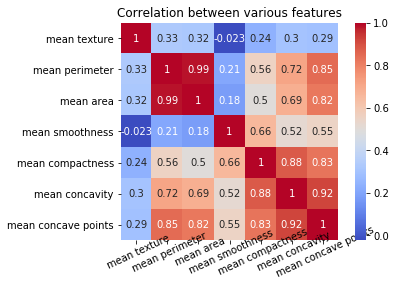

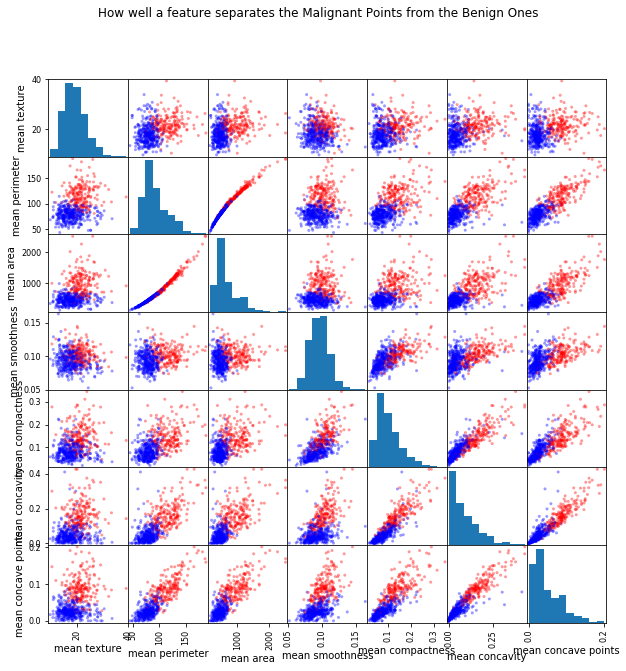

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Arrange the data as a dataframe
data1 = pd.DataFrame(data.data)
data1.columns = data.feature_names

# Plotting only 7 features out of 30
NUM_POINTS = 7
features_mean= list(data1.columns[1:NUM_POINTS+1])
feature_names = data.feature_names[1:NUM_POINTS+1]
print(feature_names)
f,ax = plt.subplots(1,1) #plt.figure(figsize=(10,10))
sns.heatmap(data1[features_mean].corr(), annot=True, square=True, cmap='coolwarm')

# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])

# Set ticks labels for x-axis
ax.set_xticklabels(feature_names, rotation=25, rotation_mode="anchor",fontsize=10)

# Set number of ticks for y-axis
ax.set_yticks([float(n)+0.5 for n in range(NUM_POINTS)])

# Set ticks labels for y-axis
ax.set_yticklabels(feature_names, rotation='horizontal', fontsize=10)

plt.title("Correlation between various features")
plt.show()
plt.close()
color_dic = {0:'red', 1:'blue'} 
target_list = list(data['target'])
colors = list(map(lambda x: color_dic.get(x), target_list))

#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(data1[features_mean], c= colors, alpha=0.4, figsize=((10,10)))
plt.suptitle("How well a feature separates the Malignant Points from the Benign Ones")
plt.show()


In [17]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create KNN Classifiers
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn1.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("\n\nK=1, Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred)*100,1), "%")

#Train the model using the training sets
knn5.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn5.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("K=5 Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred)*100,1), "%")

#Train the model using the training sets
knn10.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = knn10.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("K=10 Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred)*100,1), "%")



K=1, Accuracy: 91.2 %
K=5 Accuracy: 89.5 %
K=10 Accuracy: 91.2 %
